<p style="text-align: center;">Long Short Term Memory (LSTM)<br>for time series prediction
</p>
<p style="text-align: center;">here: number of passengers</p>

<p style="text-align: center;">
 by Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org
</p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-the-dataset" data-toc-modified-id="Get-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get the dataset</a></span></li><li><span><a href="#Load-the-dataset" data-toc-modified-id="Load-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the dataset</a></span></li><li><span><a href="#Plot-the-time-series" data-toc-modified-id="Plot-the-time-series-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot the time series</a></span></li><li><span><a href="#Normalize-the-raw-data" data-toc-modified-id="Normalize-the-raw-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Normalize the raw data</a></span></li><li><span><a href="#Split-data-into-training-and-test-data" data-toc-modified-id="Split-data-into-training-and-test-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Split data into training and test data</a></span></li><li><span><a href="#Prepare-sequence-to-sequence-training/test-data" data-toc-modified-id="Prepare-sequence-to-sequence-training/test-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Prepare sequence-to-sequence training/test data</a></span></li><li><span><a href="#Prepare-input-to-be-fed-into-LSTM" data-toc-modified-id="Prepare-input-to-be-fed-into-LSTM-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Prepare input to be fed into LSTM</a></span></li><li><span><a href="#Build-and-train-a-first-LSTM-model" data-toc-modified-id="Build-and-train-a-first-LSTM-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Build and train a first LSTM model</a></span></li><li><span><a href="#Use-the-trained-LSTM-to-predict-values" data-toc-modified-id="Use-the-trained-LSTM-to-predict-values-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Use the trained LSTM to predict values</a></span></li><li><span><a href="#Plot-the-prediction-results" data-toc-modified-id="Plot-the-prediction-results-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Plot the prediction results</a></span></li><li><span><a href="#Putting-all-code-for-experiments-together" data-toc-modified-id="Putting-all-code-for-experiments-together-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Putting all code for experiments together</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Experiments</a></span></li><li><span><a href="#Stacked-LSTM-networks" data-toc-modified-id="Stacked-LSTM-networks-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Stacked LSTM networks</a></span></li><li><span><a href="#Stateful-LSTM" data-toc-modified-id="Stateful-LSTM-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Stateful LSTM</a></span></li></ul></div>

# Get the dataset

For training a LSTM model for time series prediction, we need a dataset.

This notebook here is stronlgy inspired by [Jason Brownlee's LSTM blog](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ "Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras"). In this blog a real dataset is used that [can be downloaded from the DataMarket website](https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line "International airline passengers dataset") and contains the number of international airline passengers on a monthly basis (specified in thousands) from Jan 1949 to December 1960.

However, it seems that his website is outdated since DataMarket was acquired by a company called Qlik.

For this it is good to see that the dataset [can now also available be downloaded from Kaggle](https://www.kaggle.com/andreazzini/international-airline-passengers) as a simple .csv file with 144 data rows.

Note:
 - you should remove the last line from the .csv file which contains some explanatory text.
 - for the sake of simplicity when accessing data columns: rename the 2nd column of the dataset to "Passengers"

# Load the dataset

We can load in the dataset easily using Pandas.

In [1]:
import pandas as pd
filename = "passengers_dataset/international-airline-passengers.csv"
table = pd.read_csv( filename )

In [2]:
table

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


# Plot the time series

We can use MatplobLib for dislaying the time series as a graph.

table has type <class 'pandas.core.frame.DataFrame'>
time_series has type <class 'numpy.ndarray'>


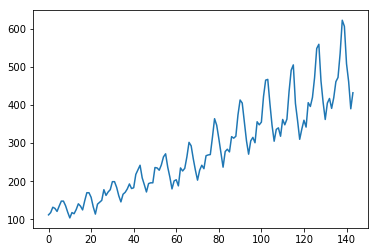

In [3]:
import matplotlib.pyplot as plt

print("table has type", type(table))
time_series_raw = table["Passengers"].values
print("time_series has type", type(time_series_raw))

plt.plot(time_series_raw)
plt.show()

# Normalize the raw data

For Neural Networks it is always good, if the input data is scaled. This makes it easier for the network to find suitable weights.

We can use [Scikit-learn's MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to do this job.



In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
time_series_scaled_as_matrix = scaler.fit_transform( time_series_raw.reshape(-1,1) )
time_series_scaled = time_series_scaled_as_matrix.reshape(-1)

C:\Users\Juergen Brauer\AppData\Local\conda\conda\envs\pythonkurs\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
time_series_scaled

array([ 0.01544402,  0.02702703,  0.05405405,  0.04826255,  0.03281853,
        0.05984556,  0.08494208,  0.08494208,  0.06177606,  0.02895753,
        0.        ,  0.02702703,  0.02123552,  0.04247104,  0.07142857,
        0.05984556,  0.04054054,  0.08687259,  0.12741313,  0.12741313,
        0.1042471 ,  0.05598456,  0.01930502,  0.06949807,  0.07915058,
        0.08880309,  0.14285714,  0.11389961,  0.13127413,  0.14285714,
        0.18339768,  0.18339768,  0.15444015,  0.11196911,  0.08108108,
        0.11969112,  0.12934363,  0.14671815,  0.17181467,  0.14864865,
        0.15250965,  0.22007722,  0.24324324,  0.26640927,  0.2027027 ,
        0.16795367,  0.13127413,  0.17374517,  0.17760618,  0.17760618,
        0.25482625,  0.25289575,  0.24131274,  0.26833977,  0.30888031,
        0.32432432,  0.25675676,  0.20656371,  0.14671815,  0.18725869,
        0.19305019,  0.16216216,  0.25289575,  0.23745174,  0.25096525,
        0.30888031,  0.38223938,  0.36486486,  0.2992278 ,  0.24

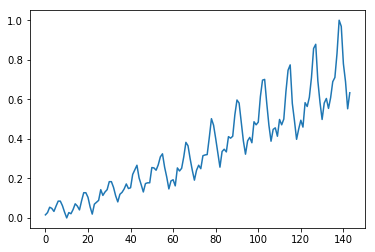

In [6]:
plt.plot(time_series_scaled)
plt.show()

# Split data into training and test data

There is only one time series. So what is the training and what is the test data?

The solution is: we can use some part of the time series for the training data and some part for the test data.

In [7]:
ratio_of_data_to_use_for_training = 0.67
len_dataset = len(time_series_scaled)
train_size = int(len_dataset * ratio_of_data_to_use_for_training)
test_size = len_dataset - train_size

train_series = time_series_scaled[0:train_size]
test_series  = time_series_scaled[train_size:]

print("train_series has length", len(train_series))
print("test_series has length", len(test_series))

train_series has length 96
test_series has length 48


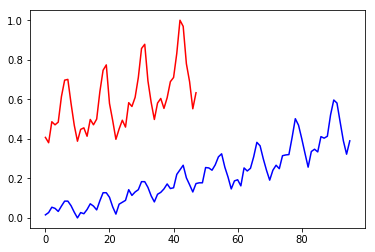

In [8]:
plt.plot(train_series, 'b')
plt.plot(test_series, 'r')
plt.show()

# Prepare sequence-to-sequence training/test data

We have split the time series into a training and a test time series.

However, for training the LSTM we need to prepare the training data for example as following if we want to predict for a sequence of 3 values the next time series value:

    [value_t-2, value_t-1, value_t  ] --> value_t+1
    [value_t-1, value_t  , value_t+1] --> value_t+2
    [value_t  , value_t+1, value_t+2] --> value_t+3
    ...
    etc.

So in general for a sequence-to-sequence prediction task we need to prepare the input for the LSTM to have the form:

n = nr_inputs, m=nr_outputs

    [value_0, value_1, ..., value_n-1] -> [value_n+0, ..., value_n+m-1]
    [value_1, value_2, ..., value_n  ] -> [value_n+1, ..., value_n+1+m-1]
    etc.


In [9]:
import numpy as np

def to_sequence_data(dataset, n=1, m=1):
    dataX, dataY = [], []
    for i in range( len(dataset)-n-1 ):
        a = dataset[ i : i+n ]
        dataX.append( a )
        dataY.append( dataset[ i+n : i+n+m ] )
    return np.array(dataX), np.array(dataY)

In [10]:
nr_inp_time_steps=3
nr_out_time_steps=1
trainX, trainY = to_sequence_data(train_series,
                                  nr_inp_time_steps,
                                  nr_out_time_steps)
testX, testY = to_sequence_data(test_series,
                                nr_inp_time_steps,
                                nr_out_time_steps)

In [11]:
print(trainX[0], "-->", trainY[0])
print(trainX[1], "-->", trainY[1])
print(trainX[2], "-->", trainY[2])

[ 0.01544402  0.02702703  0.05405405] --> [ 0.04826255]
[ 0.02702703  0.05405405  0.04826255] --> [ 0.03281853]
[ 0.05405405  0.04826255  0.03281853] --> [ 0.05984556]


# Prepare input to be fed into LSTM

Preparing the input to a LSTM can be a little bit tricky!

However, Jason Brownlee has a blog which provides a
gentle introduction into the topic:

"The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:

    - Samples. One sequence is one sample. A batch is comprised of one or more samples.
    - Time Steps. One time step is one point of observation in the sample.
    - Features. One feature is one observation at a time step.
    
When defining the input layer of your LSTM network,
the network assumes you have 1 or more samples and
requires that you specify the number of time steps and
the number of features. You can do this by specifying
a tuple to the “input_shape” argument.

For example, the model below defines an input layer
that expects 1 or more samples, 50 time steps, and 2 features.

    model = Sequential()
    model.add(LSTM(32, input_shape=(50, 2)))
    model.add(Dense(1))"

Quotation source:
https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

Currently trainX has the following shape:

In [12]:
print("trainX shape is", trainX.shape)
print("trainY shape is", trainY.shape)

print("testX.shape is", testX.shape)
print("testY shape is", testY.shape)

trainX shape is (92, 3)
trainY shape is (92, 1)
testX.shape is (44, 3)
testY shape is (44, 1)


In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], nr_inp_time_steps, 1))
testX = np.reshape(testX, (testX.shape[0], nr_inp_time_steps, 1))

In [14]:
print("trainX shape is", trainX.shape)
print("trainY shape is", trainY.shape)

print("testX.shape is", testX.shape)
print("testY shape is", testY.shape)

trainX shape is (92, 3, 1)
trainY shape is (92, 1)
testX.shape is (44, 3, 1)
testY shape is (44, 1)


# Build and train a first LSTM model

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(4, input_shape=(nr_inp_time_steps, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=2)


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 - 1s - loss: 0.0465
Epoch 2/100
 - 0s - loss: 0.0352
Epoch 3/100
 - 0s - loss: 0.0262
Epoch 4/100
 - 0s - loss: 0.0200
Epoch 5/100
 - 0s - loss: 0.0149
Epoch 6/100
 - 0s - loss: 0.0124
Epoch 7/100
 - 0s - loss: 0.0105
Epoch 8/100
 - 0s - loss: 0.0101
Epoch 9/100
 - 0s - loss: 0.0097
Epoch 10/100
 - 0s - loss: 0.0093
Epoch 11/100
 - 0s - loss: 0.0091
Epoch 12/100
 - 0s - loss: 0.0088
Epoch 13/100
 - 0s - loss: 0.0085
Epoch 14/100
 - 0s - loss: 0.0083
Epoch 15/100
 - 0s - loss: 0.0080
Epoch 16/100
 - 0

# Use the trained LSTM to predict values

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [17]:
print("trainPredict has shape", trainPredict.shape)
print("testPredict has shape", testPredict.shape)

trainPredict has shape (92, 1)
testPredict has shape (44, 1)


In [18]:
# show the first five predicted passenger numbers
# on the train and test data
print(trainPredict[0:5,])
print(testPredict[0:5,])

[[ 0.0680025 ]
 [ 0.07527962]
 [ 0.0744398 ]
 [ 0.07795798]
 [ 0.08969746]]
[[ 0.4214538 ]
 [ 0.44122413]
 [ 0.4700214 ]
 [ 0.52197427]
 [ 0.59877056]]


In [19]:
# rescale predictions and ground truth to original scale
trainPredict_origscale = scaler.inverse_transform(trainPredict)
trainY_origscale = scaler.inverse_transform(trainY)
testPredict_origscale = scaler.inverse_transform(testPredict)
testY_origscale = scaler.inverse_transform(testY)

print(trainPredict_origscale[0:5,])
print(trainY_origscale[0:5,])

print(testPredict_origscale[0:5,])
print(testY_origscale[0:5,])

[[ 139.22529602]
 [ 142.99484253]
 [ 142.55981445]
 [ 144.38223267]
 [ 150.46327209]]
[[ 129.]
 [ 121.]
 [ 135.]
 [ 148.]
 [ 148.]]
[[ 322.31307983]
 [ 332.55410767]
 [ 347.47106934]
 [ 374.38269043]
 [ 414.16317749]]
[[ 348.]
 [ 355.]
 [ 422.]
 [ 465.]
 [ 467.]]


In [20]:
# calculate prediction error on train and test data
a1 = trainY_origscale[0]
a2 = trainPredict_origscale[:,0]
diff_train = a1-a2
print(diff_train[0:20])
train_error = np.average(np.abs(diff_train))
print("Avg train error: %.2f" % train_error)

a3 = testY_origscale[0]
a4 = testPredict_origscale[:,0]
diff_test = a3-a4
print(diff_test[0:20])
test_error = np.average(np.abs(diff_test))
print("Avg test error: %.2f" % test_error)


[-10.22529602 -13.99484253 -13.55981445 -15.38223267 -21.46327209
 -27.74832153 -26.55892944 -17.97360229  -6.54434204  -3.80557251
  -3.33580017  -8.80558777 -15.68984985 -19.8343811  -18.19775391
 -22.14004517 -33.15309143 -43.93095398 -44.4637146  -32.85749817]
Avg train error: 87.55
[  25.68692017   15.44589233    0.52893066  -26.38269043  -66.16317749
  -97.69210815  -84.15716553  -42.46588135    8.52218628   23.99349976
   23.76934814   23.17010498   11.3531189     9.06951904   -4.27523804
  -34.07034302  -82.53988647 -123.69256592 -101.85064697  -56.97988892]
Avg test error: 67.22


# Plot the prediction results

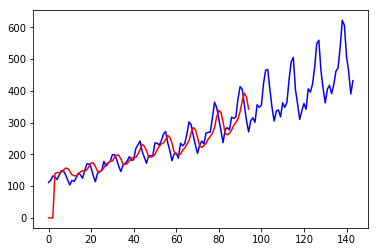

In [21]:
# Plot prediction results on train data
plt.plot(time_series_raw, "blue")

graph_pred_train = np.zeros(nr_inp_time_steps+len(a2))
graph_pred_train[nr_inp_time_steps:] = a2
plt.plot(graph_pred_train, "red")

plt.show()

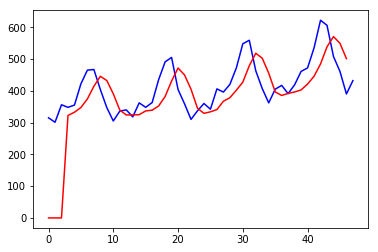

In [22]:
# Plot prediction results on test data
test_series_origscale = time_series_raw[train_size:]
plt.plot(test_series_origscale, "blue")

graph_pred_test = np.zeros(nr_inp_time_steps+len(a4))
graph_pred_test[nr_inp_time_steps:] = a4
plt.plot(graph_pred_test, "red")

plt.show()

# Putting all code for experiments together

Now that we have seen how to load in the data, split it into training and testing data, prepare it as input for a Keras LSTM, build a LSTM model, how to train it and use it for time series prediction, we put all the code together in one code snippet in order to be able to conduct different experiments.

Now let us conduct a first experiment where we train the LSTM model 200 epochs instead of 100:

In [23]:
def do_lstm_experiment(exp_nr,
                       nr_inp_time_steps,
                       nr_out_time_steps,
                       nr_lstm_cells,
                       nr_train_epochs,
                       batch_size_to_use,
                       show_plots=False):
    
    # Fix random seed for making
    # sure, we always start with the same weights
    np.random.seed(123)
    
    print("\n", exp_nr, ". Experiment with:", sep='')
    print("\t nr_inp_time_steps=", nr_inp_time_steps)
    print("\t nr_out_time_steps=", nr_out_time_steps)
    print("\t nr_lstm_cells=", nr_lstm_cells)
    print("\t nr_train_epochs=", nr_train_epochs)
    print("\t batch_size_to_use=", batch_size_to_use)
        

    # 1.
    # We need to re-prepare the train and test data
    # depending on the number of input time steps
    # used and depending on how many time steps shall
    # be predicted
    trainX, trainY = to_sequence_data(train_series,
                                      nr_inp_time_steps,
                                      nr_out_time_steps)
    testX, testY = to_sequence_data(test_series,
                                    nr_inp_time_steps,
                                    nr_out_time_steps)


    # 2.
    # Reshape input to be [samples, time steps, features]
    # this is the shape of the input that is needed for
    # the Keras LSTM as input!
    trainX = np.reshape(trainX,(trainX.shape[0], nr_inp_time_steps, 1))
    testX  = np.reshape(testX, (testX.shape[0], nr_inp_time_steps, 1))


    # 3.
    # Build a Keras LSTM model and train it
    model = Sequential()
    model.add(LSTM(nr_lstm_cells, input_shape=(nr_inp_time_steps, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')    
    model.fit(trainX,
              trainY,
              epochs=nr_train_epochs,
              batch_size=batch_size_to_use,
              verbose=0)


    # 4.
    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)


    # 5.
    # Rescale predictions and ground truth to original scale
    trainPredict_origscale = scaler.inverse_transform(trainPredict)
    trainY_origscale = scaler.inverse_transform(trainY)
    testPredict_origscale = scaler.inverse_transform(testPredict)
    testY_origscale = scaler.inverse_transform(testY)


    # 6.
    # Calculate prediction error on train data
    a1 = trainY_origscale[0]
    a2 = trainPredict_origscale[:,0]
    diff_train = a1-a2    
    train_error = np.average(np.abs(diff_train))
    
    # Calculate prediction error on test data
    a3 = testY_origscale[0]
    a4 = testPredict_origscale[:,0]
    diff_test = a3-a4    
    test_error = np.average(np.abs(diff_test))
    

    # 7.
    # If user wants, plot the predictions
    # compared to the ground truth data
    if show_plots:
        # Plot prediction results on train data
        plt.plot(time_series_raw, "blue")
        graph_pred_train = np.zeros(nr_inp_time_steps+len(a2))
        graph_pred_train[nr_inp_time_steps:] = a2
        plt.plot(graph_pred_train, "red")
        plt.show()
        # Plot prediction results on test data
        test_series_origscale = time_series_raw[train_size:]
        plt.plot(test_series_origscale, "blue")
        graph_pred_test = np.zeros(nr_inp_time_steps+len(a4))
        graph_pred_test[nr_inp_time_steps:] = a4
        plt.plot(graph_pred_test, "red")
        plt.show()
        
    # 8.
    # Show experiment results
    print("\t Avg train error: %.2f" % train_error)
    print("\t Avg test error: %.2f" % test_error)

# Experiments

In [ ]:
# The same experiments as above again
do_lstm_experiment(1, 3,1,4,100,8)

# More LSTM cells
do_lstm_experiment(2, 3,1,8,100,8)

# More LSTM cells and more training time
do_lstm_experiment(3, 3,1,8,300,8)

# More LSTM cells and even more training time
do_lstm_experiment(4, 3,1,8,600,8)

# Smaller batch size
do_lstm_experiment(5, 3,1,4,100,1)

# Stacked LSTM networks

Perceptrons can be stacked to Multi-layer perceptrons. LSTM layers can be stacked in a similar manner as well.

However, we need to understand that a LSTM operates over several time steps and for this, e.g. for 3 time steps, actually not only generates one output, but 3!

Normally we only use the last generated output value of these 3 values, but if we want to stack LSTM layers, the next layer needs to have access to the generated intermediate values in order to operate.

Here is a simple example showing how to access the generated intermediate values as well.

The example is inspired from [Jason Brownlee's blog](https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/) and uses [Keras' functional API](https://keras.io/getting-started/functional-api-guide/).


In [25]:
from keras.layers import Input
from keras.layers import LSTM
from keras.models import Model
from numpy import array
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[0.0870143]]


Note that we do not train the LSTM model. We just use it here with its randomly generated initial weights. We have produced one output value, right?

If we want to access the generated intermediate values, we need to set the "return_sequences" flag to True:

In [26]:
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[[0.01493617]
  [0.03676627]
  [0.06095539]]]


Now we can see all the intermediate values. The "return_sequences" flag has also to be used when we use the sequential API. Let's define another experiment function for experimenting with stacked LSTMs:

In [87]:
def do_STACKED_lstm_experiment(exp_nr,
                               nr_inp_time_steps,
                               nr_out_time_steps,
                               nr_lstm_cells_layer1,
                               nr_lstm_cells_layer2,
                               nr_train_epochs,
                               batch_size_to_use,
                               show_plots=False):
    
    # Fix random seed for making
    # sure, we always start with the same weights
    np.random.seed(123)
    
    print("\n", exp_nr, ". STACKED LSTM Experiment with:", sep='')
    print("\t nr_inp_time_steps=", nr_inp_time_steps)
    print("\t nr_out_time_steps=", nr_out_time_steps)
    print("\t nr_lstm_cells_layer1=", nr_lstm_cells_layer1)
    print("\t nr_lstm_cells_layer2=", nr_lstm_cells_layer2)
    print("\t nr_train_epochs=", nr_train_epochs)
    print("\t batch_size_to_use=", batch_size_to_use)
        

    # 1.
    # We need to re-prepare the train and test data
    # depending on the number of input time steps
    # used and depending on how many time steps shall
    # be predicted
    trainX, trainY = to_sequence_data(train_series,
                                      nr_inp_time_steps,
                                      nr_out_time_steps)
    testX, testY = to_sequence_data(test_series,
                                    nr_inp_time_steps,
                                    nr_out_time_steps)


    # 2.
    # Reshape input to be [samples, time steps, features]
    # this is the shape of the input that is needed for
    # the Keras LSTM as input!
    trainX = np.reshape(trainX,(trainX.shape[0], nr_inp_time_steps, 1))
    testX  = np.reshape(testX, (testX.shape[0], nr_inp_time_steps, 1))


    # 3.
    # Build a Keras LSTM model and train it
    model = Sequential()
    model.add(LSTM(nr_lstm_cells_layer1,
                   input_shape=(nr_inp_time_steps, 1),
                   return_sequences=True))
    model.add(LSTM(nr_lstm_cells_layer2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')    
    model.fit(trainX,
              trainY,
              epochs=nr_train_epochs,
              batch_size=batch_size_to_use,
              verbose=0)


    # 4.
    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)


    # 5.
    # Rescale predictions and ground truth to original scale
    trainPredict_origscale = scaler.inverse_transform(trainPredict)
    trainY_origscale = scaler.inverse_transform(trainY)
    testPredict_origscale = scaler.inverse_transform(testPredict)
    testY_origscale = scaler.inverse_transform(testY)


    # 6.
    # Calculate prediction error on train data
    a1 = trainY_origscale[0]
    a2 = trainPredict_origscale[:,0]
    diff_train = a1-a2    
    train_error = np.average(np.abs(diff_train))
    
    # Calculate prediction error on test data
    a3 = testY_origscale[0]
    a4 = testPredict_origscale[:,0]
    diff_test = a3-a4    
    test_error = np.average(np.abs(diff_test))
    

    # 7.
    # If user wants, plot the predictions
    # compared to the ground truth data
    if show_plots:
        # Plot prediction results on train data
        plt.plot(time_series_raw, "blue")
        graph_pred_train = np.zeros(nr_inp_time_steps+len(a2))
        graph_pred_train[nr_inp_time_steps:] = a2
        plt.plot(graph_pred_train, "red")
        plt.show()
        # Plot prediction results on test data
        test_series_origscale = time_series_raw[train_size:]
        plt.plot(test_series_origscale, "blue")
        graph_pred_test = np.zeros(nr_inp_time_steps+len(a4))
        graph_pred_test[nr_inp_time_steps:] = a4
        plt.plot(graph_pred_test, "red")
        plt.show()
        
    # 8.
    # Show experiment results
    print("\t Avg train error: %.2f" % train_error)
    print("\t Avg test error: %.2f" % test_error)

Here are some corresponding experiments to compare the stacked with the non-stacked LSTM variant:

In [88]:
do_lstm_experiment(1, 3,1,4,100,8)
do_STACKED_lstm_experiment(1, 3,1, 4,4, 100,8 )

# More LSTM cells, more training time
do_lstm_experiment(2, 3,1,8,500,8)
do_STACKED_lstm_experiment(2, 3,1, 8,6, 500,8 )


1. Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 4
	 nr_train_epochs= 100
	 batch_size_to_use= 8
	 Avg train error: 88.86
	 Avg test error: 64.38

1. STACKED LSTM Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells_layer1= 4
	 nr_lstm_cells_layer2= 4
	 nr_train_epochs= 100
	 batch_size_to_use= 8
	 Avg train error: 87.60
	 Avg test error: 47.29

2. Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 8
	 nr_train_epochs= 500
	 batch_size_to_use= 8
	 Avg train error: 90.52
	 Avg test error: 61.34

2. STACKED LSTM Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells_layer1= 8
	 nr_lstm_cells_layer2= 6
	 nr_train_epochs= 500
	 batch_size_to_use= 8
	 Avg train error: 88.05
	 Avg test error: 63.15


# Stateful LSTM

A LSTM cell stores its state c and feeds its output o recursively back into itselves, right?

For the first sample: (x1,x2,x3)

  - If you use 3 input time steps, we will feed in first value x_1. The LSTM cell will compute some cell state c_1 and output o_1.

  - When we feed in value x_2, the LSTM cells will also use the cell state c_1 and its output o_1 from the previous time step.

  - When we feed in value x_3, the LSTM cells will also use the cell state c_2 and its output o_2 from the previous time step.

For the second sample: (x4,x5,x6)

Now comes the question, start with zero vectors for c and o or use the previously computed values c_3 and o_3?

This is the different between a "stateless LSTM" and a "stateful LSTM".

Note: The following code generates a stateful LSTM. However, we also need to prepare the data such that we have training data of the form:

    x1,x2,x3 -> x4
    x4,x5,x6 -> x7
    x7,x8,x9 -> x10
    etc.
    
 For this, there is a new function to_sequence_data_stateful().

In [103]:
def to_sequence_data_stateful(dataset, n=1, m=1):
    dataX, dataY = [], []
    i=0
    while i+n+m<len(dataset):
        a = dataset[ i : i+n ]
        dataX.append( a )
        dataY.append( dataset[ i+n : i+n+m ] )
        i=i+n
    return np.array(dataX), np.array(dataY)


def do_STATEFUL_lstm_experiment(exp_nr,
                                nr_inp_time_steps,
                                nr_out_time_steps,
                                nr_lstm_cells,
                                nr_train_epochs,
                                show_plots=False):
    
    batch_size_to_use = 1
    
    # Fix random seed for making
    # sure, we always start with the same weights
    np.random.seed(123)
    
    print("\n", exp_nr, ". STATEFUL LSTM Experiment with:", sep='')
    print("\t nr_inp_time_steps=", nr_inp_time_steps)
    print("\t nr_out_time_steps=", nr_out_time_steps)
    print("\t nr_lstm_cells=", nr_lstm_cells)
    print("\t nr_train_epochs=", nr_train_epochs)
    print("\t batch_size_to_use=", batch_size_to_use)
        

    # 1.
    # We need to re-prepare the train and test data
    # depending on the number of input time steps
    # used and depending on how many time steps shall
    # be predicted
    trainX, trainY = to_sequence_data_stateful(train_series,
                                               nr_inp_time_steps,
                                               nr_out_time_steps)
    testX, testY = to_sequence_data_stateful(test_series,
                                             nr_inp_time_steps,
                                             nr_out_time_steps)


    # 2.
    # Reshape input to be [samples, time steps, features]
    # this is the shape of the input that is needed for
    # the Keras LSTM as input!
    trainX = np.reshape(trainX,(trainX.shape[0], nr_inp_time_steps, 1))
    testX  = np.reshape(testX, (testX.shape[0], nr_inp_time_steps, 1))
    print("trainX has shape", trainX.shape)


    # 3.
    # Build a Keras LSTM model and train it
    model = Sequential()
    model.add(LSTM(nr_lstm_cells,
                   input_shape=(nr_inp_time_steps, 1),
                   stateful=True,
                   batch_input_shape=(batch_size_to_use, 
                                      nr_inp_time_steps,
                                      1)
                  )
             )
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')        
    model.fit(trainX,
              trainY,
              epochs=nr_train_epochs,
              batch_size=batch_size_to_use,
              shuffle=False,
              verbose=0)

    # 4.
    # Make predictions
    trainPredict = model.predict(trainX, batch_size=1)
    testPredict = model.predict(testX, batch_size=1)


    # 5.
    # Rescale predictions and ground truth to original scale
    trainPredict_origscale = scaler.inverse_transform(trainPredict)
    trainY_origscale = scaler.inverse_transform(trainY)
    testPredict_origscale = scaler.inverse_transform(testPredict)
    testY_origscale = scaler.inverse_transform(testY)


    # 6.
    # Calculate prediction error on train data
    a1 = trainY_origscale[0]
    a2 = trainPredict_origscale[:,0]
    diff_train = a1-a2    
    train_error = np.average(np.abs(diff_train))
    
    # Calculate prediction error on test data
    a3 = testY_origscale[0]
    a4 = testPredict_origscale[:,0]
    diff_test = a3-a4    
    test_error = np.average(np.abs(diff_test))
    

    # 7.
    # If user wants, plot the predictions
    # compared to the ground truth data
    if show_plots:
        # Plot prediction results on train data
        plt.plot(time_series_raw, "blue")
        graph_pred_train = np.zeros(nr_inp_time_steps+len(a2))
        graph_pred_train[nr_inp_time_steps:] = a2
        plt.plot(graph_pred_train, "red")
        plt.show()
        # Plot prediction results on test data
        test_series_origscale = time_series_raw[train_size:]
        plt.plot(test_series_origscale, "blue")
        graph_pred_test = np.zeros(nr_inp_time_steps+len(a4))
        graph_pred_test[nr_inp_time_steps:] = a4
        plt.plot(graph_pred_test, "red")
        plt.show()
        
    # 8.
    # Show experiment results
    print("\t Avg train error: %.2f" % train_error)
    print("\t Avg test error: %.2f" % test_error)

In [106]:
do_STATEFUL_lstm_experiment(1, 3,1, 4, 100)
do_STATEFUL_lstm_experiment(2, 3,1, 4, 300)
do_STATEFUL_lstm_experiment(3, 3,1, 4, 500)
do_STATEFUL_lstm_experiment(4, 3,1, 4, 700)


1. STATEFUL LSTM Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 4
	 nr_train_epochs= 100
	 batch_size_to_use= 1
trainX has shape (31, 3, 1)
	 Avg train error: 90.84
	 Avg test error: 70.21

2. STATEFUL LSTM Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 4
	 nr_train_epochs= 300
	 batch_size_to_use= 1
trainX has shape (31, 3, 1)
	 Avg train error: 89.65
	 Avg test error: 54.77

3. STATEFUL LSTM Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 4
	 nr_train_epochs= 500
	 batch_size_to_use= 1
trainX has shape (31, 3, 1)
	 Avg train error: 89.40
	 Avg test error: 63.05

4. STATEFUL LSTM Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 4
	 nr_train_epochs= 700
	 batch_size_to_use= 1
trainX has shape (31, 3, 1)
	 Avg train error: 88.98
	 Avg test error: 61.82
